In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

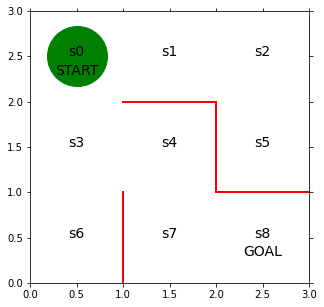

In [2]:
fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# red wall
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# state
plt.text(0.5, 2.3, 'START', size=14, ha='center')
plt.text(0.5, 2.5, 's0', size=14, ha='center')
plt.text(1.5, 2.5, 's1', size=14, ha='center')
plt.text(2.5, 2.5, 's2', size=14, ha='center')
plt.text(0.5, 1.5, 's3', size=14, ha='center')
plt.text(1.5, 1.5, 's4', size=14, ha='center')
plt.text(2.5, 1.5, 's5', size=14, ha='center')
plt.text(0.5, 0.5, 's6', size=14, ha='center')
plt.text(1.5, 0.5, 's7', size=14, ha='center')
plt.text(2.5, 0.5, 's8', size=14, ha='center')
plt.text(2.5, 0.3, 'GOAL', size=14, ha='center')

ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom='off', top='off', labelbottom='off', right='off', left='off', labelleft='off')

# agent
line, = ax.plot([0.5], [2.5], marker='o', color='g', markersize=60)

初期方策のパラメータ：行は状態，列は移動方向↑，→，↓，←

In [3]:
# parameters of an initial policy : theta_0

theta_0 = np.array([[np.nan, 1, 1, np.nan], #s0
                    [np.nan, 1, np.nan, 1], #s1
                    [np.nan, np.nan, 1, 1], #s2
                    [1, 1, 1, np.nan], #s3
                    [np.nan, np.nan, 1, 1], # s4
                    [1, np.nan, np.nan, np.nan], #s5
                    [1, np.nan, np.nan, np.nan], #s6
                    [1, 1, np.nan, np.nan], #s7 #s8 is a goal
                   ])

方向に対するθの割合を方策とする

In [4]:
# convert theta to policy pi

def simple_convert_into_pi_from_theta(theta):
    # simple ratio
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
    
    pi = np.nan_to_num(pi)
    
    return pi

In [5]:
# initial policy : pi_0
pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [6]:
pi_0

array([[0.        , 0.5       , 0.5       , 0.        ],
       [0.        , 0.5       , 0.        , 0.5       ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [0.33333333, 0.33333333, 0.33333333, 0.        ],
       [0.        , 0.        , 0.5       , 0.5       ],
       [1.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.5       , 0.5       , 0.        , 0.        ]])

In [7]:
# new state after 1 step
def get_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    # select direction from the probability of pi[s, :]
    
    if next_direction == 'up':
        s_next = s - 3
    elif next_direction == 'right':
        s_next = s + 1
    elif next_direction == 'down':
        s_next = s + 3
    elif next_direction == 'left':
        s_next = s - 1
        
    return s_next

In [8]:
# explore maze

def goal_maze(pi):
    s = 0 # start
    state_history = [0] # list of agent's explore
    
    while(1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return state_history

In [9]:
state_history = goal_maze(pi_0)

In [10]:
print(state_history)

[0, 3, 0, 1, 0, 3, 4, 3, 0, 3, 4, 7, 4, 3, 0, 1, 2, 1, 0, 3, 0, 3, 4, 7, 8]


In [11]:
print("State number was " + str(len(state_history) - 1))

State number was 24


動きの可視化

In [12]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    state  = state_history[i] # current state
    x = (state % 3) + 0.5
    y = 2.5 - int (state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames = len(state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

強化学習による最短経路の探索

In [13]:
def softmax_convert_into_pi_from_theta(theta):
    
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        # softmax
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [14]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [15]:
# get action and next state

def get_action_and_next_s(pi, s):
    direction = ['up', 'right', 'down', 'left']
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    # select direction from the probability of pi[s, :]
    
    if next_direction == 'up':
        action = 0
        s_next = s - 3
    elif next_direction == 'right':
        action = 1
        s_next = s + 1
    elif next_direction == 'down':
        action = 2
        s_next = s + 3
    elif next_direction == 'left':
        action = 3
        s_next = s - 1
        
    return [action, s_next]

In [16]:
# explore maze

def goal_maze_ret_s_a(pi):
    s = 0 # start
    s_a_history = [[0, np.nan]] # list of agent's explore
    
    while(1):
        [action, next_s] = get_action_and_next_s(pi, s)
        s_a_history[-1][1] = action
                   
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return s_a_history

In [17]:
# Only initial policy
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print("All steps were " + str(len(s_a_history)-1))

[[0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 2], [3, 2], [6, 0], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 3], [0, 1], [1, 1], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 0], [0, 1], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 1], [2, 2], [5, 0], [2, 2], [5, 0], [2, 3], [1, 1], [2, 3], [1, 3], [0, 2], [3, 1], [4, 2], [7, 0], [4, 3], [3, 1], [4, 2], [7, 1], [8, nan]]
All steps were 82


In [18]:
def update_theta(theta, pi, s_a_history):
    eta = 0.1
    T = len(s_a_history) - 1
    
    [m, n] = theta.shape
    delta_theta = theta.copy()
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i, j])):
                
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i)
                N_ij =len(SA_ij)
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
        
    return new_theta

In [19]:
# update ploicy
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi =softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.50182926 0.49817074 0.        ]
 [0.         0.50213413 0.         0.49786587]
 [0.         0.         0.49786587 0.50213413]
 [0.33346881 0.33346881 0.33306239 0.        ]
 [0.         0.         0.50030488 0.49969512]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [20]:
stop_epsilon = 10**-8

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_history = goal_maze_ret_s_a(pi)
    new_theta = update_theta(theta, pi, s_a_history)
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    print("All steps were " + str(len(s_a_history) - 1) + "steps")
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        is_continue = False
    else:
        theta = new_theta
        pi = new_pi
    print("------------------------------------------------------")

0.024999186241147497
All steps were 8steps
------------------------------------------------------
0.014472483115213486
All steps were 42steps
------------------------------------------------------
0.005430643671774427
All steps were 226steps
------------------------------------------------------
0.015731534215629728
All steps were 20steps
------------------------------------------------------
0.014666311526910392
All steps were 34steps
------------------------------------------------------
0.048952388922970436
All steps were 4steps
------------------------------------------------------
0.004358594863417498
All steps were 106steps
------------------------------------------------------
0.016678834721078062
All steps were 18steps
------------------------------------------------------
0.04967521725946272
All steps were 4steps
------------------------------------------------------
0.033351464462434866
All steps were 6steps
------------------------------------------------------
0.04221760548

In [23]:
# last_ploicy
np.set_printoptions(precision=3, suppress=True)
print(pi)

[[0.    0.    1.    0.   ]
 [0.    0.486 0.    0.514]
 [0.    0.    0.525 0.475]
 [0.    1.    0.    0.   ]
 [0.    0.    1.    0.   ]
 [1.    0.    0.    0.   ]
 [1.    0.    0.    0.   ]
 [0.    1.    0.    0.   ]]


可視化

In [25]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line, )

def animate(i):
    state  = s_a_history[i][0] # current state
    x = (state % 3) + 0.5
    y = 2.5 - int (state / 3)
    line.set_data(x, y)
    return (line,)

anim = animation.FuncAnimation(fig, animate, init_func=init, frames = len(s_a_history), interval=200, repeat=False)

HTML(anim.to_jshtml())